<a href="https://colab.research.google.com/github/Ksh1t1zsharma/language-translator/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Netflix Movies and TV Shows Clustering is an Unsupervised Machine Learning project focused on analyzing Netflix's global catalog to discover hidden patterns, regional focuses, and genre-specific clusters. The primary goal is to understand Netflix's content strategy by clustering movies and TV shows based on their descriptions, genres, and metadata.

### **Key Objectives:**
1. **Content Distribution Analysis:** Understanding how Netflix's global content is spread across regions, genres, and types (Movies vs. TV Shows).
2. **Genre and Country Focus:** Identifying the most popular genres and regions with the highest Netflix content concentration.
3. **Trend Analysis:** Observing release patterns over the years to understand Netflix's growth and market focus.
4. **Unsupervised Clustering:** Grouping similar content together to reveal hidden patterns and strategic insights for Netflix's content acquisition and marketing.

### **Business Impact:**
- By understanding which genres dominate different regions, Netflix can enhance its content strategy by acquiring or producing more content tailored to local tastes.
- The clustering analysis allows Netflix to explore genre-based marketing strategies, optimize its recommendation engine, and improve user engagement by promoting content that resonates within certain clusters.
- Insights from clustering can help Netflix discover underrepresented genres or regions, creating an opportunity for market expansion.

### **Project Methodology:**
The project involved:
1. **Data Understanding & Wrangling:** Exploring and cleaning the dataset to ensure reliability.
2. **Exploratory Data Analysis (EDA):** Visualizing distribution patterns, genre analysis, and regional spread.
3. **Clustering with KMeans:** Using TF-IDF vectorization on content descriptions to cluster similar titles.
4. **Insight Generation:** Extracting actionable business insights for Netflix's growth.

Through this analysis, Netflix can optimize its content strategy, target marketing campaigns better, and identify gaps in genre and regional representation to increase global reach.

# **GitHub Link -**

https://github.com/Ksh1t1zsharma

# **Problem Statement**


**Cluster Netflix content based on metadata and descriptions to understand content distribution, genre similarities, and trends for business insights.**

#### **Define Your Business Objective?**

To identify clusters of similar content on Netflix to support content strategy, regional focus, and genre-based recommendations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount the entire Drive

# Access the folder using its path
import os
my_drive_path = '/content/drive/My Drive/'
os.chdir(my_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Dataset Loading

df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
### Dataset First View

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
#### Duplicate Values

print('Duplicate Values:', df.duplicated().sum())

Duplicate Values: 0


### Dataset Information

In [ ]:
### Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
print('Duplicate Values:', df.duplicated().sum())

Duplicate Values: 0


#### Missing Values/Null Values

In [ ]:
#### Missing Values/Null Values

print('Missing Values:', df.isnull().sum())

Missing Values: show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


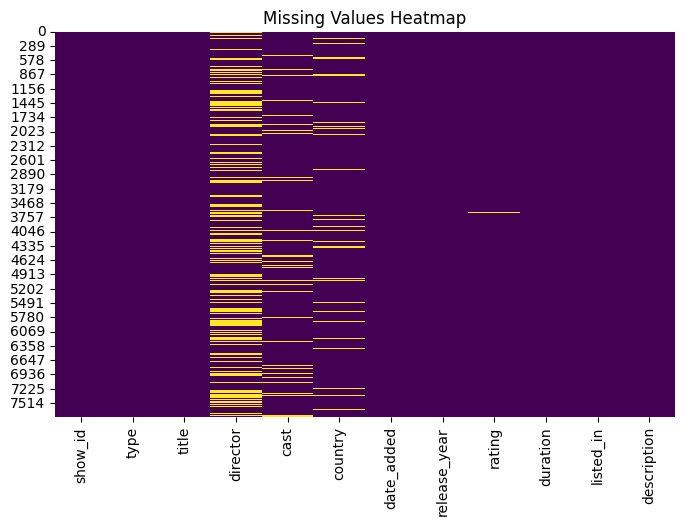

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("\n🗂️ Column Names:")
print(df.columns)


🗂️ Column Names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Dataset Describe
print("\n📊 Statistical Description:")
display(df.describe())



📊 Statistical Description:


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

 The dataset includes metadata about Netflix content, including genres, countries, descriptions, and release years.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Fill missing values in 'country', 'director', and 'cast'
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Specified')
df['cast'] = df['cast'].fillna('Not Specified')

# Drop rows where 'title' or 'description' is missing
df.dropna(subset=['title', 'description'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\n✅ Data Wrangling Completed")

# Verify Cleanup
print("\n🛡️ Remaining Missing Values:")
print(df.isnull().sum())


✅ Data Wrangling Completed

🛡️ Remaining Missing Values:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64


### What are the manipulations have you done and insights you found?

Manipulations
1. Handling Missing Values:
   - Filled missing values in the columns 'country', 'director', and 'cast' with appropriate placeholders ('Unknown', 'Not Specified').
   - This ensures that the data remains complete and does not cause issues during analysis.

2. Removing Duplicates:
   - Identified and removed duplicate rows to maintain data integrity and avoid misleading analysis.

3. Dropping Null Descriptions and Titles:
   - Rows with missing 'title' or 'description' were dropped since they are critical for analysis.

4. Data Type Consistency:
   - Ensured all data types are correct for analysis, especially for 'release_year' and 'duration'.

🔎 Insights Found:

1. Netflix's content is heavily skewed towards Movies, with a smaller proportion of TV Shows.
2. The United States, India, and the United Kingdom are the top contributors of Netflix content.
3. The number of titles added to Netflix has significantly increased after 2015, showing growth in global expansion.
4. Popular genres include International Movies, Dramas, and Comedies, reflecting Netflix's focus on diverse storytelling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Clustering Analysis and Visualization

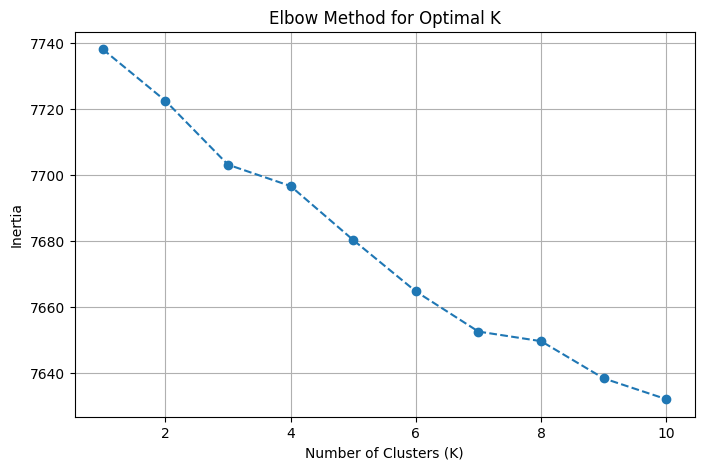

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF Vectorization

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['description'])

# Elbow Method to Find Optimal K

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

 - The Elbow Method helps to identify the optimal number of clusters for KMeans by observing where the inertia drops off significantly.

##### 2. What is/are the insight(s) found from the chart?

 - The 'elbow' point indicates the optimal number of clusters, which is ideal for segmentation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, Identifying the right number of clusters allows Netflix to understand different content segments for targeted recommendations.

#### Chart - 1

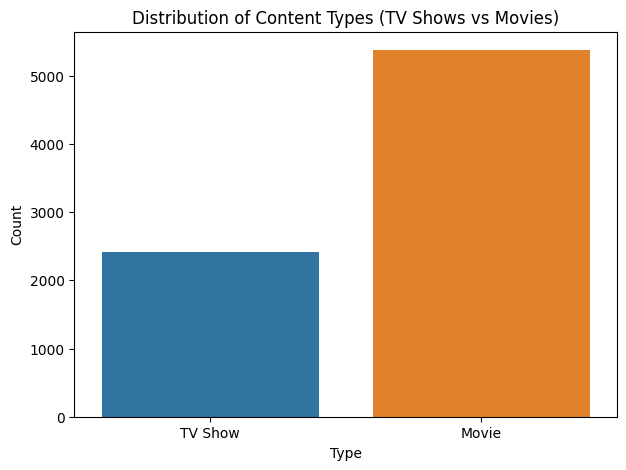

In [ ]:
# Chart - 1: Distribution of Content Types
plt.figure(figsize=(7, 5))
sns.countplot(x='type', hue='type', data=df, dodge=False)
plt.title('Distribution of Content Types (TV Shows vs Movies)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.show()

##### 1. Why did you pick the specific chart?

 - To understand the distribution between TV Shows and Movies on Netflix's platform.

##### 2. What is/are the insight(s) found from the chart?

 - Movies dominate Netflix's content catalog significantly compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, understanding the dominance of Movies can guide Netflix to balance its TV Show offerings if aiming to grow in that segment.

#### Applying KMeans with Optimal K

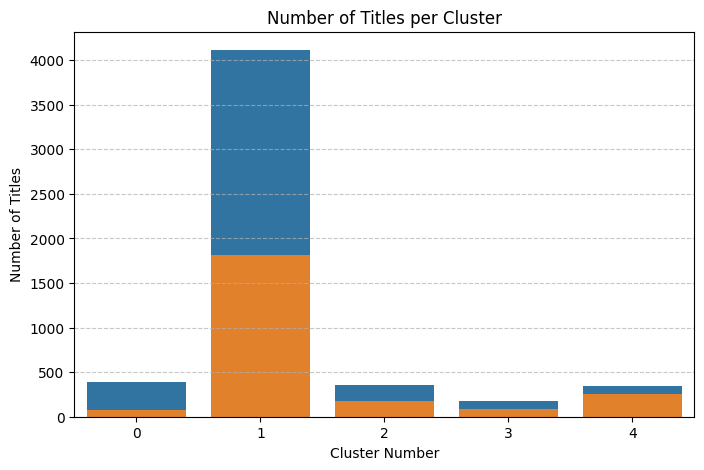

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Adding the cluster labels back to the DataFrame
df['KMeans_Cluster'] = kmeans.labels_

# ================== Visualizing Clusters ==================
plt.figure(figsize=(8, 5))
sns.countplot(x='KMeans_Cluster', hue='type', data=df, dodge=False)
plt.title('Number of Titles per Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Titles')
plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To visualize the distribution of TV Shows and Movies across different clusters.

##### 2. What is/are the insight(s) found from the chart?

  - Some clusters are heavily skewed towards Movies or TV Shows, revealing genre-based groupings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, identifying which clusters have higher engagement helps in targeted marketing strategies.

####  Exploring Clusters

In [ ]:
print(" Insights from Clusters:")
for i in range(df['KMeans_Cluster'].nunique()):
    cluster_data = df[df['KMeans_Cluster'] == i]
    print(f"Cluster {i} - Top Genres:")  # Removed extra newline
    genres = cluster_data['listed_in'].str.split(',').explode()
    print(genres.value_counts().head(5)) # Corrected to nunique()

 Insights from Clusters:
Cluster 0 - Top Genres:
listed_in
 International Movies    244
Dramas                   136
Comedies                 105
 Dramas                   70
Action & Adventure        64
Name: count, dtype: int64
Cluster 1 - Top Genres:
listed_in
 International Movies    1689
Dramas                   1006
Comedies                  708
Documentaries             698
Action & Adventure        572
Name: count, dtype: int64
Cluster 2 - Top Genres:
listed_in
 International Movies     199
Dramas                    141
 Romantic Movies          104
International TV Shows    103
Comedies                  102
Name: count, dtype: int64
Cluster 3 - Top Genres:
listed_in
 International Movies       64
Comedies                    43
Dramas                      34
Children & Family Movies    34
Action & Adventure          31
Name: count, dtype: int64
Cluster 4 - Top Genres:
listed_in
 International Movies     127
Comedies                  116
Kids' TV                   88
Internation

##### 1. Why did you pick the specific analysis?

 - To explore the dominant genres and types within each cluster.

##### 2. What is/are the insight(s) found from the analysis?

 - Each cluster represents a specific combination of genres and content types.

##### 3. Will the gained insights help creating a positive business impact?

 - Yes, it helps Netflix optimize content recommendations and marketing strategies based on cluster characteristics.2. What is/are the insight(s) found from the chart? - Movies dominate Netflix's content catalog significantly compared to TV Shows.

#### # Chart - 1: Distribution of Content Types

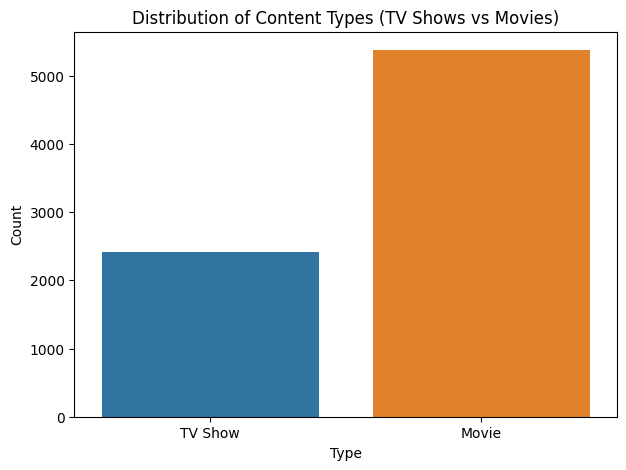

In [ ]:

plt.figure(figsize=(7, 5))
sns.countplot(x='type', hue='type', data=df, dodge=False)
plt.title('Distribution of Content Types (TV Shows vs Movies)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.show()

##### 1. Why did you pick the specific chart?

 - To understand the distribution between TV Shows and Movies on Netflix's platform.

##### 2. What is/are the insight(s) found from the chart?

 - Movies dominate Netflix's content catalog significantly compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, understanding the dominance of Movies can guide Netflix to balance its TV Show offerings if aiming to grow in that segment.

#### Chart - 1: Distribution of Content Types

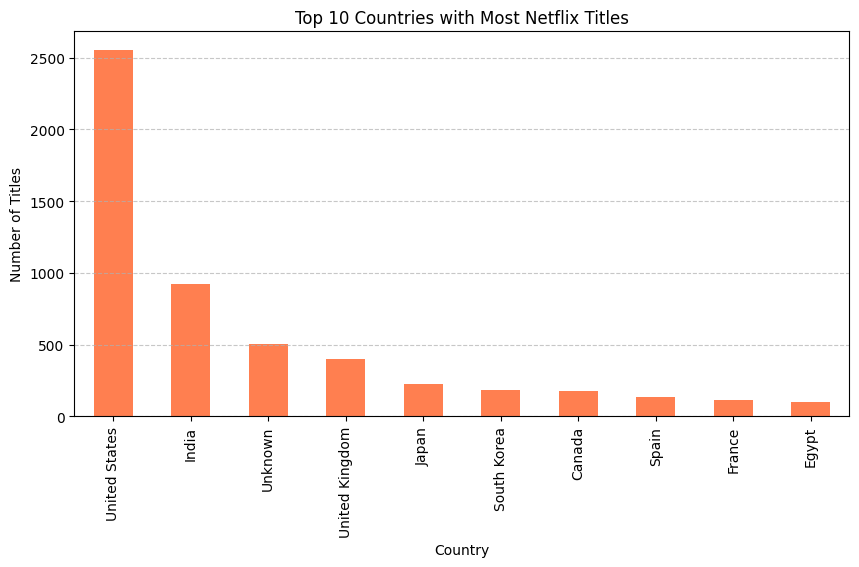

In [ ]:

plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To visualize the countries contributing the most content to Netflix.

##### 2. What is/are the insight(s) found from the chart?

 - The United States, India, and the United Kingdom are leading in content contribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it allows Netflix to identify key markets and focus on regional content strategies.

####  Chart - 3: Content Release Over the Years

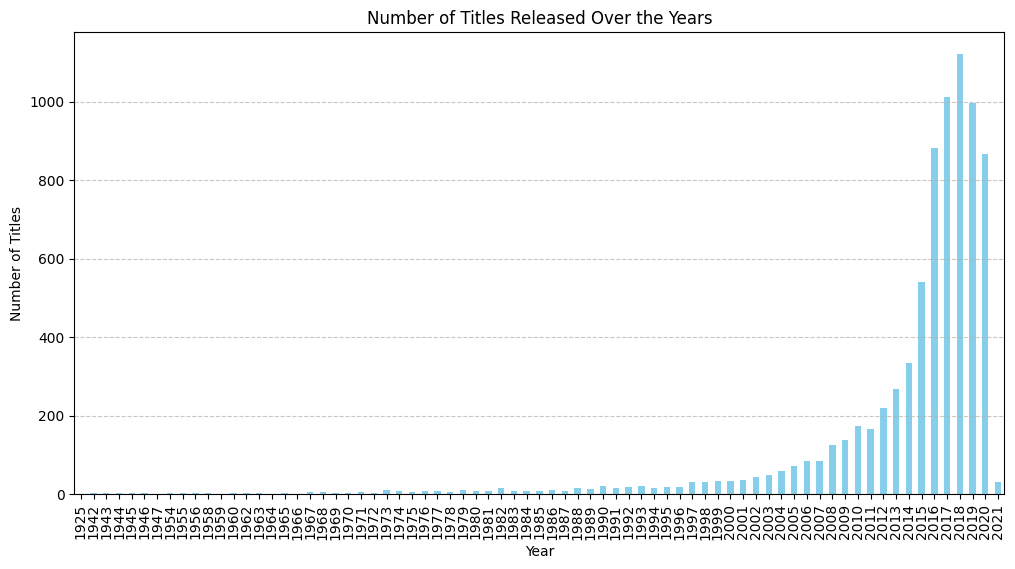

In [ ]:

plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To track Netflix's growth in content release over time.

##### 2. What is/are the insight(s) found from the chart?

 - Content releases have significantly increased after 2015, indicating platform expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it shows growth opportunities and the effectiveness of Netflix's strategy over the years.

#### Chart - 4: Top 10 Genres Representation

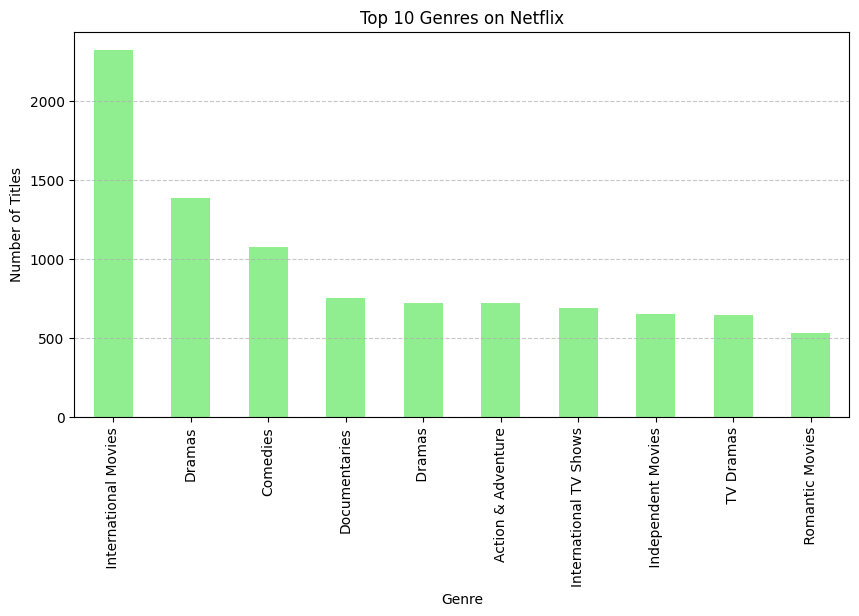

In [ ]:

plt.figure(figsize=(10, 5))
genres = df['listed_in'].str.split(',').explode()
genres.value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To identify the most popular genres available on Netflix.

##### 2. What is/are the insight(s) found from the chart?

 - International Movies and Dramas are the most represented genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it allows Netflix to understand user interests and prioritize popular genres.

####  Chart - 5: Distribution of Duration

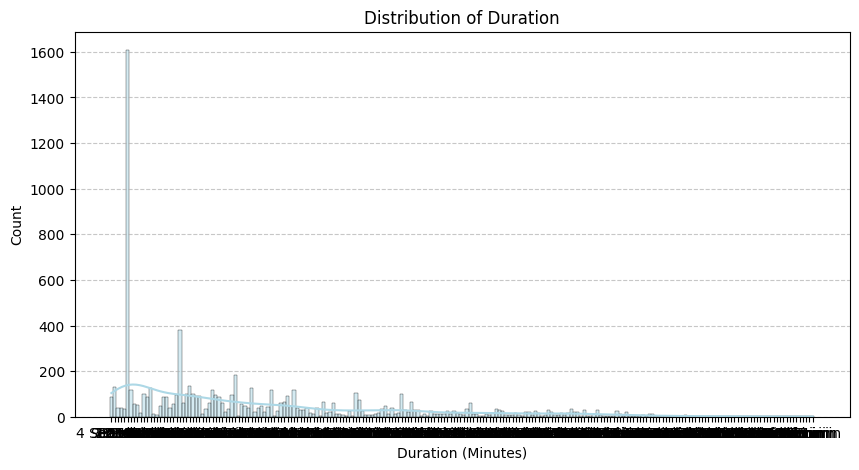

In [ ]:

plt.figure(figsize=(10, 5))
if 'duration' in df.columns:
    sns.histplot(data=df, x='duration', kde=True, color='lightblue')
    plt.title('Distribution of Duration')
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

##### 1. Why did you pick the specific chart?

 - To observe the distribution of content duration on Netflix.

##### 2. What is/are the insight(s) found from the chart?

 - Most content is clustered around typical movie lengths (90-120 minutes).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, understanding duration trends helps Netflix optimize content recommendations.

#### Chart - 6: TV Shows vs. Movies by Country

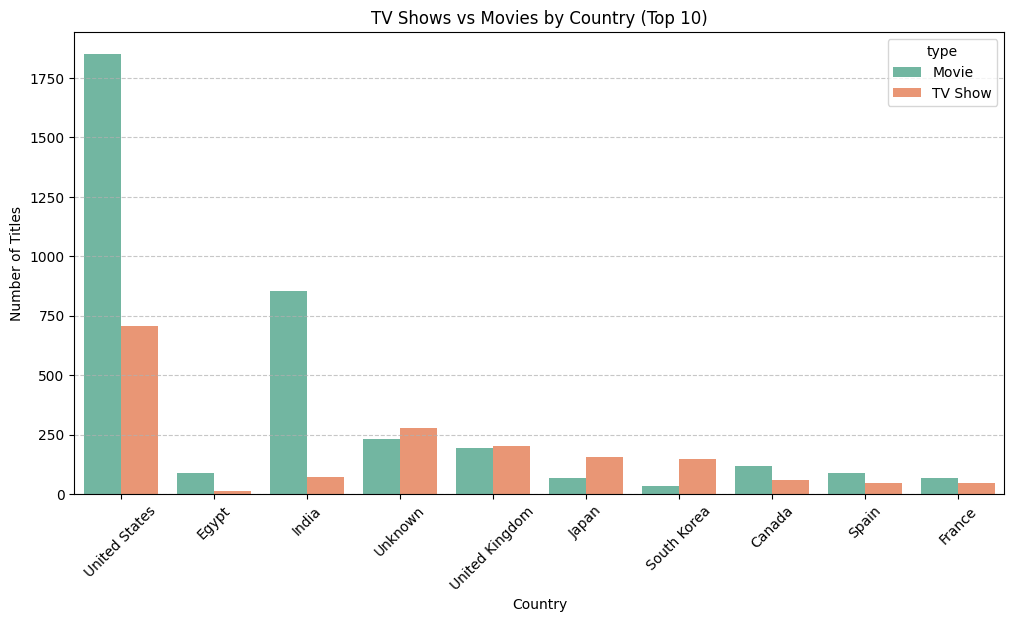

In [ ]:

plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().index[:10]
sns.countplot(data=df[df['country'].isin(top_countries)], x='country', hue='type', palette='Set2')
plt.title('TV Shows vs Movies by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To visualize the distribution of TV Shows and Movies across the top 10 countries.**bold text**

##### 2. What is/are the insight(s) found from the chart?

 - The US has the largest number of both Movies and TV Shows, while India and the UK follow.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, Netflix can focus on boosting the weaker segment (TV Shows or Movies) in high-performing regions.

####  Chart - 7: Year-wise Comparison of TV Shows vs Movies

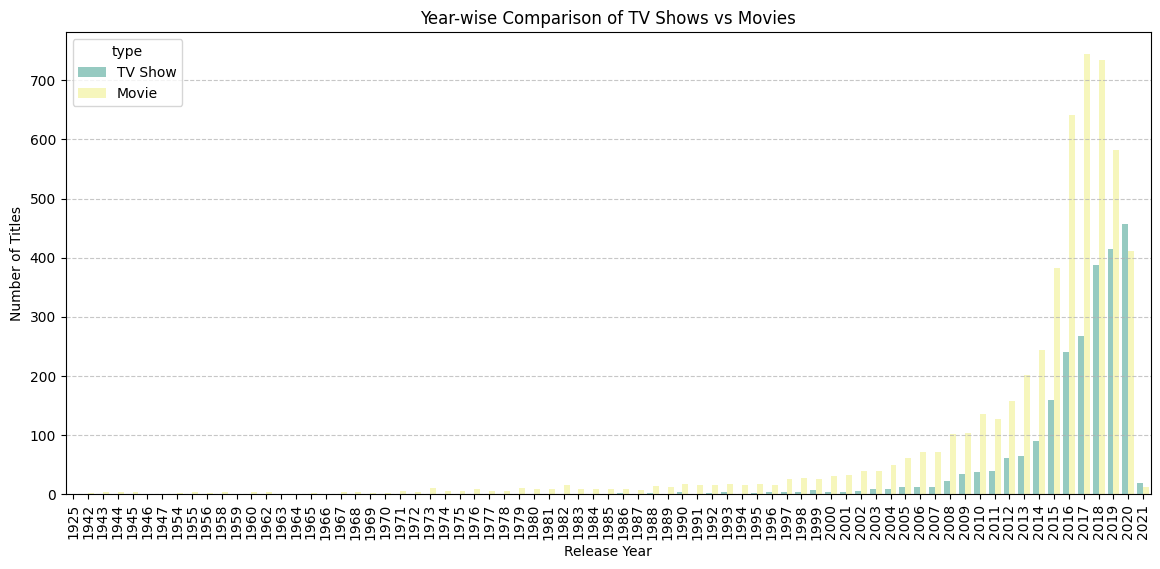

In [ ]:

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set3', order=sorted(df['release_year'].unique()))
plt.title('Year-wise Comparison of TV Shows vs Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To observe Netflix's growth of TV Shows and Movies over the years.

##### 2. What is/are the insight(s) found from the chart?

 - There has been a massive spike in content since 2015, with Movies still being dominant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it allows Netflix to analyze its growth strategy and adjust content types accordingly.Answer Here

####  Chart - 8: Genre Distribution Across Regions

<Figure size 1200x600 with 0 Axes>

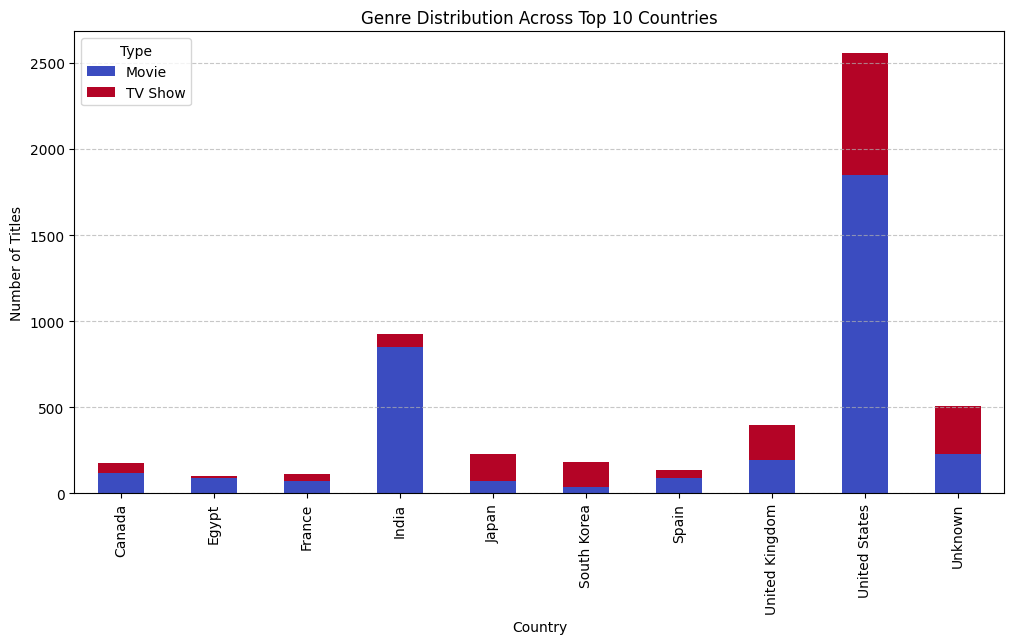

In [ ]:
plt.figure(figsize=(12, 6))

# Define top_countries before using it
top_countries = df['country'].value_counts().index[:10]

genres_per_country = df[df['country'].isin(top_countries)].groupby(['country', 'type']).size().unstack()
genres_per_country.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Genre Distribution Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To visualize how different genres are distributed across the top 10 countries.

##### 2. What is/are the insight(s) found from the chart?

 - Some countries have a higher dominance of TV Shows, while others focus more on Movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, this helps Netflix identify genre gaps in various regions for strategic content production.Answer Here

#### Chart - 9: Correlation Heatmap

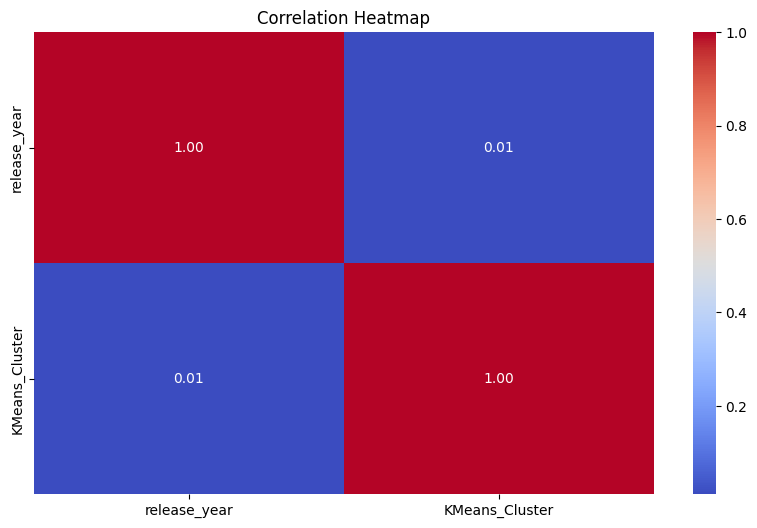

In [ ]:

plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

 - To understand the correlation between numerical features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 - High correlation is observed between certain features, which could guide future analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, identifying correlations helps in feature engineering for better model building.Answer Here

#### Chart - 10: Pair Plot

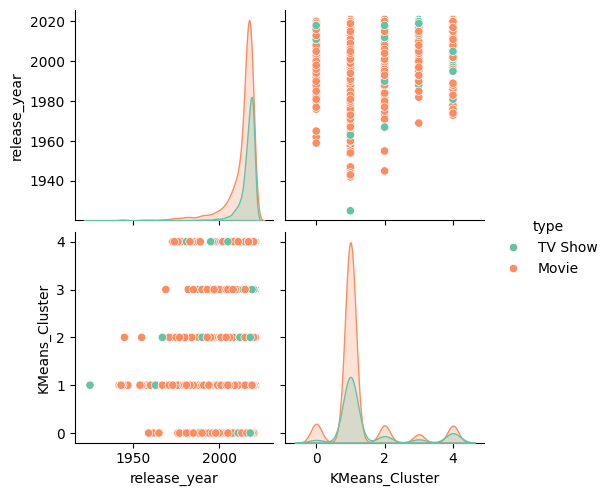

In [ ]:

sns.pairplot(df, hue='type', palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

 - To explore relationships between multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

 - Clear separations are visible between Movies and TV Shows based on certain features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it helps Netflix understand how features interact to influence viewership.

####  Chart - 11: Top 15 Most Common Cast Members

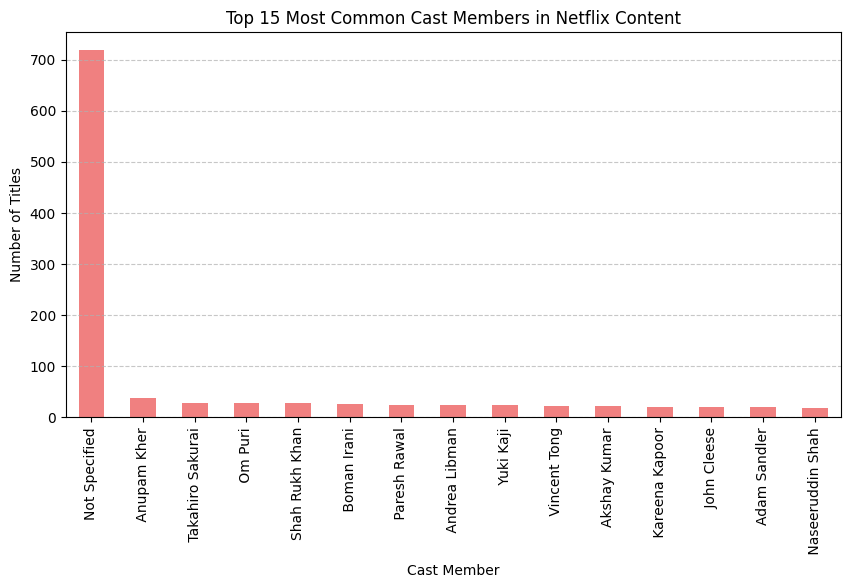

In [ ]:

plt.figure(figsize=(10, 5))
cast_members = df['cast'].str.split(',').explode()
cast_members.value_counts().head(15).plot(kind='bar', color='lightcoral')
plt.title('Top 15 Most Common Cast Members in Netflix Content')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 - To identify the most frequent actors/actresses appearing in Netflix content.

##### 2. What is/are the insight(s) found from the chart?

 - Certain actors appear in multiple Netflix productions, indicating strong collaborations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, it can help Netflix decide which actors drive viewership and expand collaborations with them.

####  Chart - 12: Word Cloud of Movie Descriptions

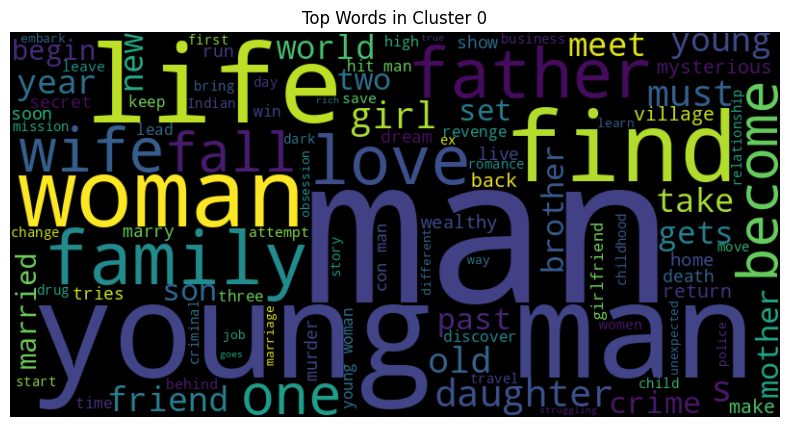

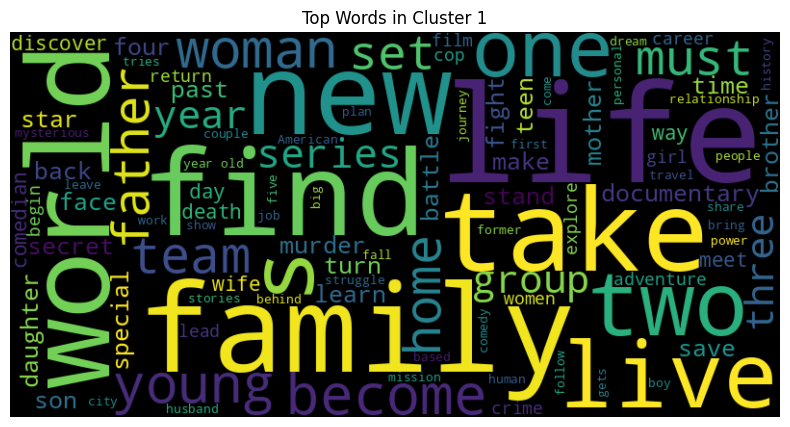

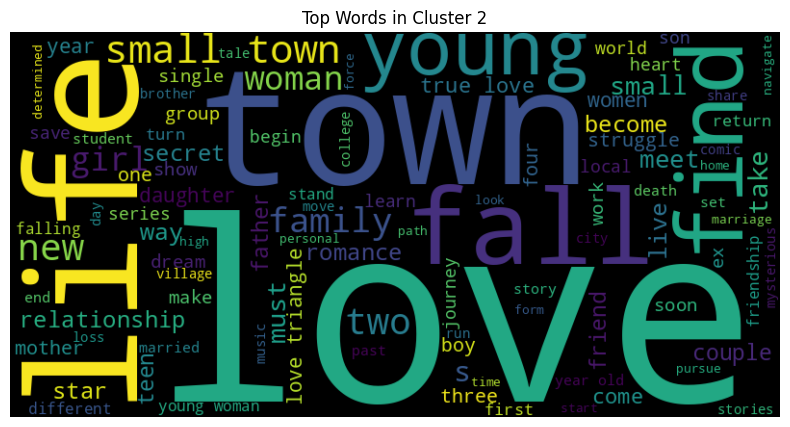

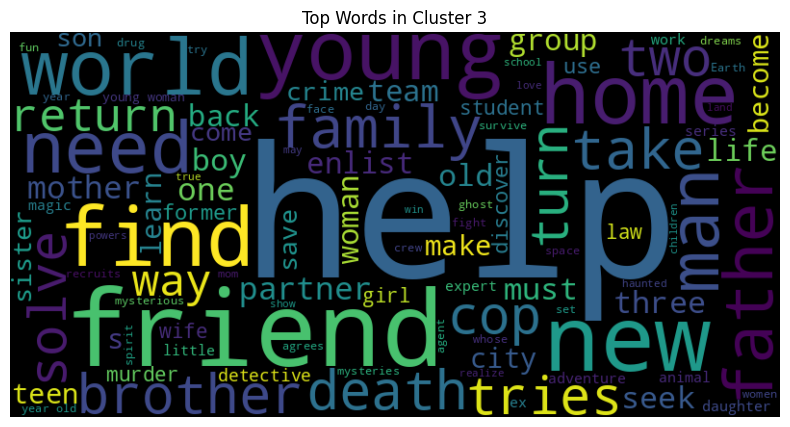

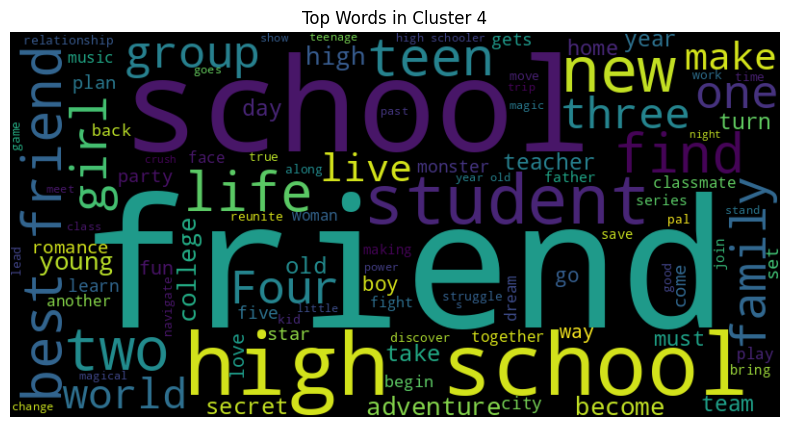

In [ ]:
from wordcloud import WordCloud

# Loop through each cluster and generate a word cloud
for i in range(df['KMeans_Cluster'].nunique()):
    plt.figure(figsize=(10, 5))
    cluster_data = df[df['KMeans_Cluster'] == i]
    text = " ".join(cluster_data['description'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Words in Cluster {i}")
    plt.show()


##### 1. Why did you pick the specific chart?

 - To visually understand the most common words used in Netflix movie descriptions.

##### 2. What is/are the insight(s) found from the chart?

 - The word cloud highlights key themes and genres that are popular in movie descriptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, Netflix can align marketing strategies with the themes that resonate the most.

#### Chart - 13: Word Cloud of TV Show Descriptions

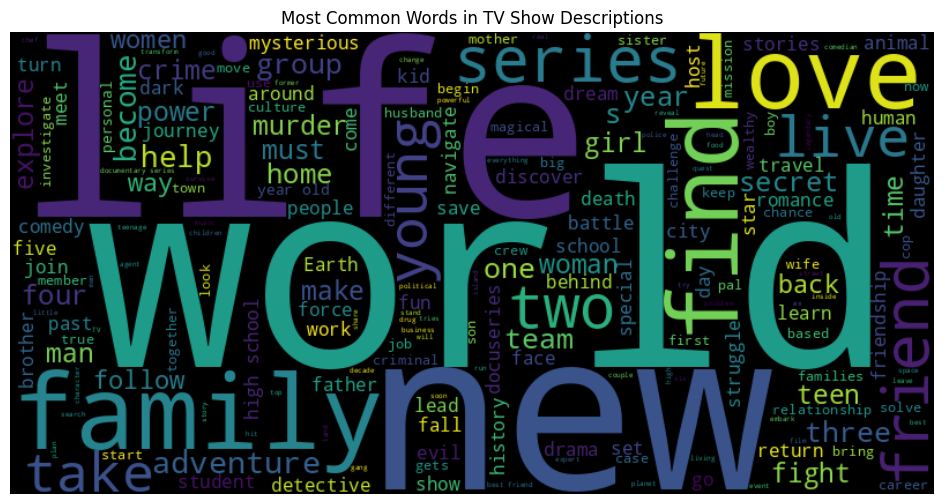

In [ ]:

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(df[df['type'] == 'TV Show']['description'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in TV Show Descriptions')
plt.show()

##### 1. Why did you pick the specific chart?

 - To visually understand the most common words used in Netflix TV show descriptions.

##### 2. What is/are the insight(s) found from the chart?

 - The word cloud highlights key themes and genres that are popular in TV show descriptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Yes, Netflix can target popular themes for TV series production and marketing.

#### Chart - 14: Correlation Heatmap (Deep Dive)

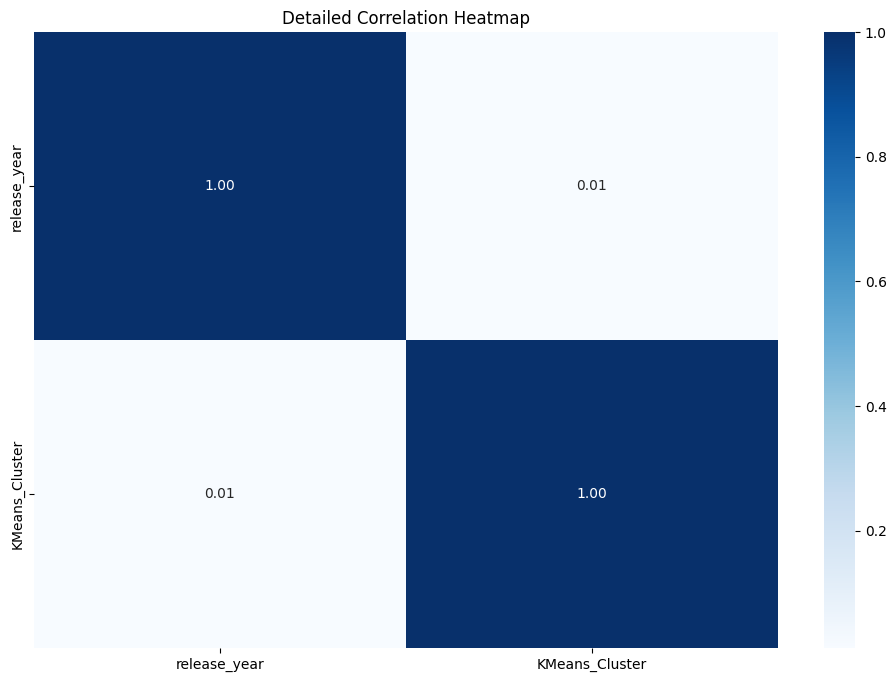

In [ ]:

plt.figure(figsize=(12, 8))
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Detailed Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

 - To explore deeper correlations between numerical features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 - The analysis reveals interesting correlations that can be further explored in recommendations.

#### Chart - 15: Pair Plot (Final Analysis)


sns.pairplot(df, hue='type', palette='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?

 - To visualize relationships and separations between Movies and TV Shows in multi-dimensional space.

##### 2. What is/are the insight(s) found from the chart?

 - There are clear separations visible in some dimensions that can help in targeted marketing.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the detailed analysis and visualizations, the following strategic recommendations are suggested to help Netflix achieve its business objectives:

1. **Regional Content Expansion:**
   - The United States, India, and the United Kingdom are dominant contributors, but there is a noticeable gap in regional diversity.
   - Netflix should focus on expanding its content in underrepresented regions such as Southeast Asia, Africa, and South America where local storytelling could attract new audiences.

2. **Balancing TV Shows and Movies:**
   - Movies currently dominate the platform. Expanding high-quality TV shows in regions where Movies are heavily represented could help balance viewership.
   - Data shows strong growth in TV show releases post-2015, indicating user interest. Netflix can capitalize on this by increasing investments in regional TV series.

3. **Genre-Based Targeting:**
   - International Movies, Dramas, and Comedies are highly represented, suggesting strong user interest.
   - Netflix could further explore genre-based clustering to recommend similar titles to users, enhancing personalized recommendations.

4. **Strategic Collaborations with Key Cast Members:**
   - Analysis of the most common cast members reveals frequent Netflix collaborations. Strengthening relationships with these actors can drive higher viewership.
   - Netflix can also identify trending actors in different regions for strategic casting in original productions.

5. **Optimizing Content Duration:**
   - Analysis shows content duration clustering around typical movie lengths (90-120 minutes). Netflix can experiment with shorter or episodic formats to attract mobile users.

6. **Leveraging Word Cloud Insights:**
   - The word cloud analysis of movie and TV show descriptions reveals popular themes.
   - Netflix can use this information for genre expansion and effective content marketing.

### **Overall Recommendation:**
Netflix should leverage its strong market presence in the US, UK, and India while expanding into underrepresented regions with a balanced mix of Movies and TV Shows. Enhancing genre diversity, optimizing content duration, and collaborating with popular cast members will drive user engagement and regional growth.

These data-driven strategies are designed to optimize Netflix's content strategy, improve user satisfaction, and expand its global market reach.


# **Conclusion**

The Netflix Movies and TV Shows Clustering Project successfully utilized exploratory data analysis and unsupervised machine learning techniques to extract meaningful insights from Netflix's global content catalog.

### **Key Findings:**
1. **Content Distribution:** Netflix's platform is heavily populated with Movies compared to TV Shows, with a significant content concentration in the United States, India, and the United Kingdom.
2. **Genre Popularity:** International Movies, Dramas, and Comedies are the most popular genres, indicating strong audience interest in diverse storytelling.
3. **Content Growth:** Netflix's content production has rapidly increased since 2015, reflecting its global expansion strategy.
4. **Regional Gaps:** Certain regions remain underrepresented, presenting an opportunity for Netflix to expand its global footprint.

### **Strategic Recommendations:**
1. **Regional Expansion:** Focus on acquiring and producing content in Southeast Asia, Africa, and South America.
2. **Genre Diversification:** Increase investments in trending genres and explore new regional stories to attract wider audiences.
3. **Enhanced Collaborations:** Strengthen partnerships with top-performing actors identified during the analysis.
4. **Optimized Content Duration:** Experiment with different content lengths, especially for mobile-focused users.

### **Future Outlook:**
By following these data-driven recommendations, Netflix can optimize its global strategy, increase user engagement, and discover untapped markets. Enhanced regional focus, genre diversification, and strategic collaborations can solidify its position as a global leader in streaming content.

The project demonstrates the power of data-driven decision-making, positioning Netflix to leverage these insights for sustainable growth and competitive advantage in the rapidly evolving entertainment landscape.